# Кластеризация. Домашняя работа

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [2]:
file_data = 'geo_comment.xlsx'
df = pd.read_excel(file_data)

In [3]:
#Определяем количество районов (кластеры) учасников слушаний 
rngNClusters = range(1, 20) #задаем диапозон кластеров для анализа
k_inertia = [] #список расстояний до центра кластера
clusters_kmeans = {}
for k in rngNClusters:
    mdlKmeans = KMeans(n_clusters = k)
    clusters_kmeans[k] = mdlKmeans.fit_predict( df[ ['x', 'y'] ], )
    k_inertia.append(mdlKmeans.inertia_)


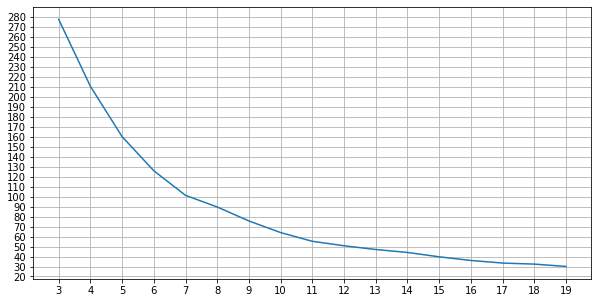

[(1, 1653.2386339675484),
 (2, 543.4160462002238),
 (3, 277.5938220813624),
 (4, 210.532989940298),
 (5, 160.09052958576893),
 (6, 125.9288436342212),
 (7, 101.29515960300681),
 (8, 89.63809071700125),
 (9, 75.6280159516844),
 (10, 64.01037640628356),
 (11, 55.26842701706446),
 (12, 50.771368755019424),
 (13, 47.05741952126428),
 (14, 44.07972516538681),
 (15, 39.71520705810158),
 (16, 36.07280733615533),
 (17, 33.45934759818594),
 (18, 32.407004643322544),
 (19, 30.065634641637377)]

In [4]:
#График (зависимость количества кластеров от расстояния до центра) для определения оптимального кол-ва кластеров
#применяем правило "локтя"
fig, ax = plt.subplots( figsize=(10, 5) )
#Для наглядной картины обрежем 1, 2 кластеры
ax.plot(rngNClusters[2:], k_inertia[2:])
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.grid()
plt.show()
list(zip(rngNClusters, k_inertia)) 

###### Применяя правило "локтя" видим, что после 7 итерации изменения ~10, соответственно количество кластеров берем 7

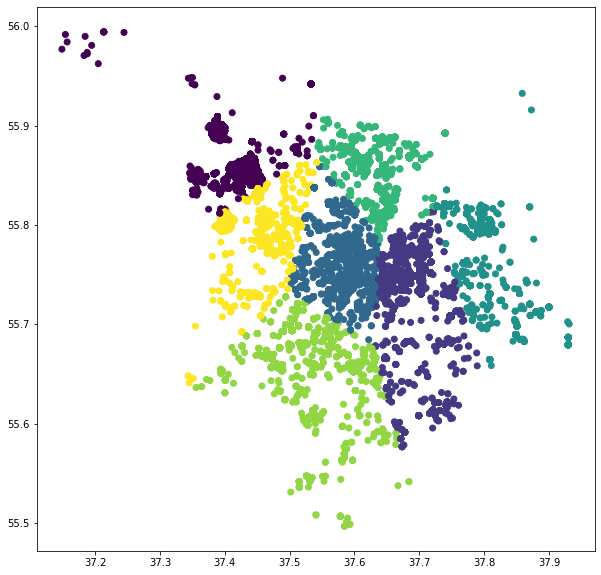

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df.x, df.y, c = clusters_kmeans[7])
plt.show()

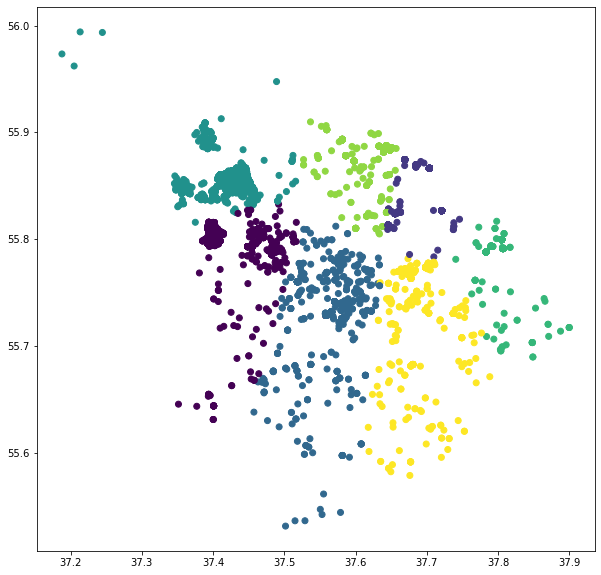

In [6]:
#Распределение голосов "ЗА"
mdlKmeans = KMeans(n_clusters = 7)
clusters_kmeans = mdlKmeans.fit_predict( df[(df['comment_class'] == 1)][['x', 'y']], )

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df[(df['comment_class'] == 1)].x, 
           df[(df['comment_class'] == 1)].y, c = clusters_kmeans)
plt.show()


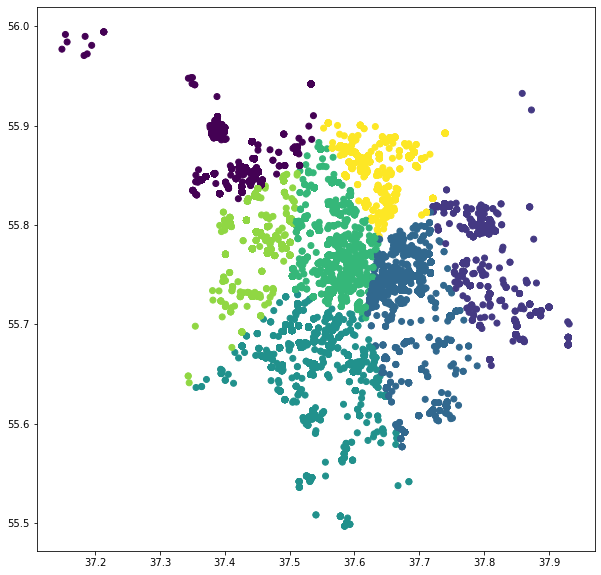

In [7]:
#Распределение голосов "Против"
clusters_kmeans = mdlKmeans.fit_predict( df[(df['comment_class'] == -1)][['x', 'y']], )

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df[(df['comment_class'] == -1)].x, 
           df[(df['comment_class'] == -1)].y, c = clusters_kmeans)
plt.show()